### Import dependencies 

In [217]:
import pandas as pd
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imghdr
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

### Loading Data 

In [218]:
_dir = "eye_data"
img_dir = os.listdir(_dir)
img_dir

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [219]:
img_ext = ['jpg','png', 'jpeg']
for img_dir in os.listdir(_dir):
    for imgs in os.listdir(os.path.join(_dir, img_dir)):
        img_path = os.path.join(_dir, img_dir, imgs)
        try:
            img = cv2.imread(img_path)
            img_end = imghdr.what(img_path)
            if img_end not in img_ext:
                print("imgage extension is not valid {}".format(img_path))
                os.remove(img_path)
        except Exception as e:
            print("issue with the image {}".format(img_path))
        

In [220]:
def load_images(img_directory):
    images = []
    labels = []
    for imgs in os.listdir(img_directory):
        img_path = os.path.join(img_directory, imgs)
        img = cv2.imread(img_path)        
        if img is not None:            
            img = cv2.resize(img, (64, 64))
            
            images.append(img)
            if "normal" in imgs:
                labels.append(0)
            elif "cataract" in imgs:
                labels.append(1)
            elif "diabetic_retinopathy" in imgs:
                labels.append(2)
            elif "glaucoma" in imgs:
                labels.append(3)
            else:
                labels.append(-1)  # Handle cases where the class is not found
    return images, labels

In [221]:
def rename_files(folder_path, new_name):
    file_list = os.listdir(folder_path)
    file_count = len(file_list)
    
    for i, filename in enumerate(file_list):
        extension = os.path.splitext(filename)[1]  # Get the file extension
        new_filename = f"{new_name}_{i+1}{extension}"  # Create the new filename with an auto-incremented ID
        old_filepath = os.path.join(folder_path, filename)
        new_filepath = os.path.join(folder_path, new_filename)
        os.rename(old_filepath, new_filepath)
        print(f"Renamed {filename} to {new_filename}")

In [222]:
normal_dir = os.path.join(_dir, "normal")
cataract_dir = os.path.join(_dir, "cataract")
diabetic_retinopathy_dir = os.path.join(_dir, "diabetic_retinopathy")
glaucoma_dir = os.path.join(_dir, "glaucoma")

In [ ]:
rename_files(normal_dir, "normal")
rename_files(cataract_dir, "cataract")
rename_files(diabetic_retinopathy_dir, "diabetic_retinopathy")
rename_files(glaucoma_dir, "glaucoma")

###  Data 

In [223]:
img = cv2.imread(os.path.join(glaucoma_dir, 'glaucoma_3.jpg'))
img
#0 Values because it is shaded by black background

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [224]:
img[240]
#Here we go 

array([[  0,   1,   2],
       [  0,   0,   4],
       [  0,   0,  10],
       ...,
       [142, 187, 191],
       [  0,   0,   4],
       [  2,   0,   3]], dtype=uint8)

In [225]:
img.shape

(512, 512, 3)

### Data Visualization

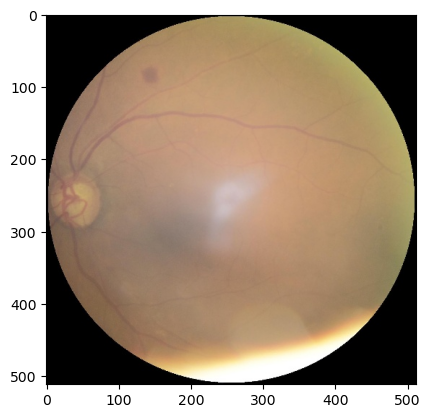

In [226]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [227]:
normal_images, normal_labels = load_images(normal_dir)
cataract_images, cataract_labels = load_images(cataract_dir)
diabetic_retinopathy_images, diabetic_retinopathy_labels = load_images(diabetic_retinopathy_dir)
glaucoma_images, glaucoma_labels = load_images(glaucoma_dir)

In [228]:
len(normal_images),len(cataract_images), len(diabetic_retinopathy_images),len(glaucoma_images)

(1074, 1038, 1098, 1007)

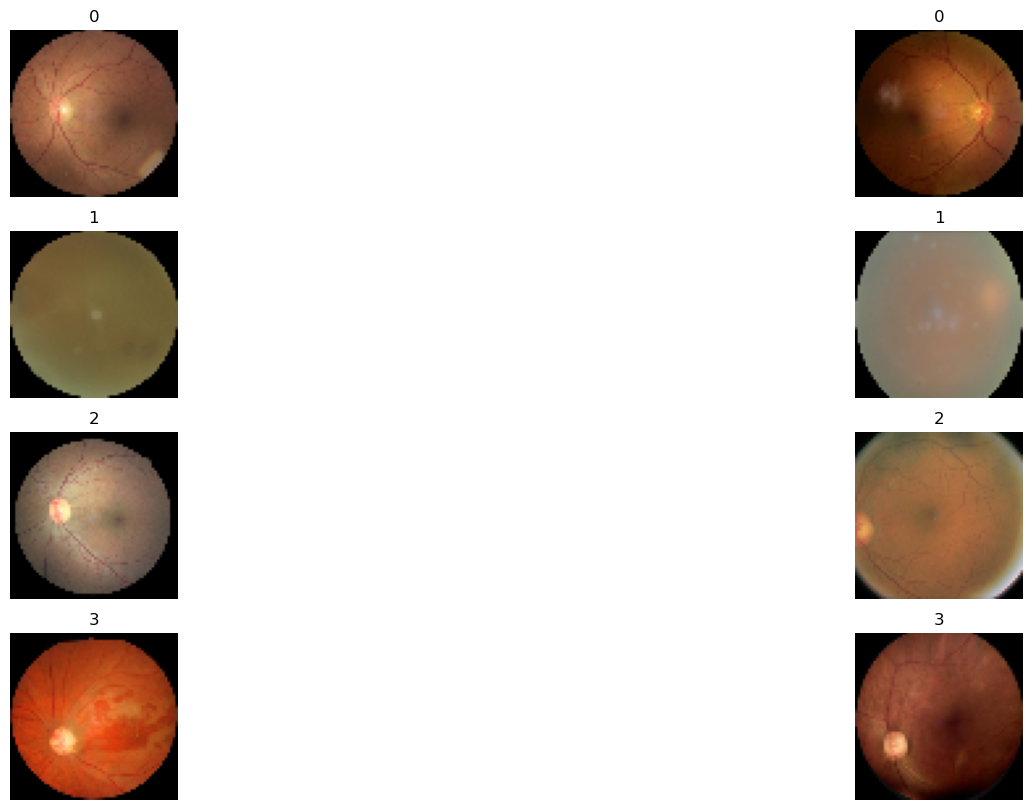

In [229]:

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 10))

for i in range(2):
    axs[0, i].imshow(cv2.cvtColor(normal_images[i], cv2.COLOR_BGR2RGB))
    axs[0, i].set_title(normal_labels[i])
    axs[0, i].axis('off')
    axs[1, i].imshow(cv2.cvtColor(cataract_images[i], cv2.COLOR_BGR2RGB))
    axs[1, i].set_title(cataract_labels[i])
    axs[1, i].axis('off')
    axs[2, i].imshow(cv2.cvtColor(diabetic_retinopathy_images[i], cv2.COLOR_BGR2RGB))
    axs[2, i].set_title(diabetic_retinopathy_labels[i])
    axs[2, i].axis('off')
    axs[3, i].imshow(cv2.cvtColor(glaucoma_images[i], cv2.COLOR_BGR2RGB))
    axs[3, i].set_title(glaucoma_labels[i])
    axs[3, i].axis('off')
# Show the plot
plt.show()


### Splitting Data 

In [230]:
images = np.concatenate([normal_images, cataract_images, diabetic_retinopathy_images , glaucoma_images])
labels = np.concatenate([normal_labels, cataract_labels, diabetic_retinopathy_labels, glaucoma_labels])

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size=0.5)

train_images.min(),train_images.max()

(0, 255)

In [231]:
cataract_images

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [232]:
# Scale the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images / 255.0

train_images.min(),train_images.max()

(0.0, 1.0)

In [233]:
train_labels_encoded = to_categorical(train_labels, num_classes=4)
val_labels_encoded = to_categorical(val_labels, num_classes=4)
test_labels_encoded = to_categorical(test_labels, num_classes=4)

# Model Build and Training

In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.utils import to_categorical

## Simple CNN 

In [292]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3),1, activation='relu', input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D())
cnn_model.add(Dropout(0.25))
cnn_model.add(Conv2D(64, (3, 3),1, activation='relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Dropout(0.25))
cnn_model.add(Conv2D(128, (3, 3),1, activation='relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Dropout(0.25))
cnn_model.add(Conv2D(256, (5, 5),1, activation='relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(4, activation='softmax'))

In [293]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [294]:
cnn_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 14, 14, 64)      

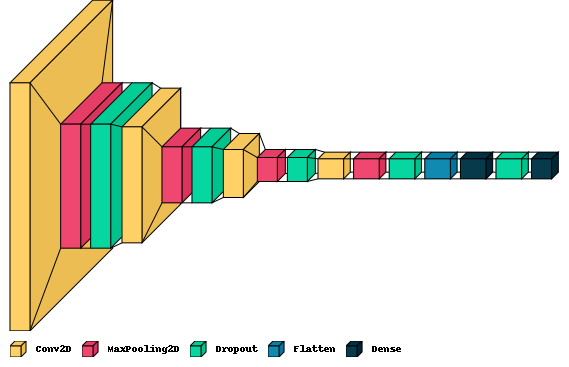

In [295]:
import visualkeras
visualkeras.layered_view(cnn_model, legend=True)

In [297]:
cnn_history = cnn_model.fit(train_images, train_labels_encoded ,epochs=100 , validation_data=(val_images, val_labels_encoded))

Epoch 1/100
93/93 [==============================] - 19s 208ms/step - loss: 1.2694 - accuracy: 0.4521 - val_loss: 1.0932 - val_accuracy: 0.5308
Epoch 2/100
93/93 [==============================] - 18s 198ms/step - loss: 0.9894 - accuracy: 0.5700 - val_loss: 0.9056 - val_accuracy: 0.6193
Epoch 3/100
93/93 [==============================] - 18s 198ms/step - loss: 0.8087 - accuracy: 0.6462 - val_loss: 0.7726 - val_accuracy: 0.6825
Epoch 4/100
93/93 [==============================] - 21s 230ms/step - loss: 0.7171 - accuracy: 0.7015 - val_loss: 0.6177 - val_accuracy: 0.7615
Epoch 5/100
93/93 [==============================] - 21s 225ms/step - loss: 0.6512 - accuracy: 0.7252 - val_loss: 0.5790 - val_accuracy: 0.7867
Epoch 6/100
93/93 [==============================] - 21s 224ms/step - loss: 0.5887 - accuracy: 0.7608 - val_loss: 0.5812 - val_accuracy: 0.7678
Epoch 7/100
93/93 [==============================] - 20s 217ms/step - loss: 0.5797 - accuracy: 0.7689 - val_loss: 0.5102 - val_accuracy:

93/93 [==============================] - 24s 253ms/step - loss: 0.2128 - accuracy: 0.9265 - val_loss: 0.3324 - val_accuracy: 0.8989
Epoch 58/100
93/93 [==============================] - 23s 252ms/step - loss: 0.1983 - accuracy: 0.9322 - val_loss: 0.3832 - val_accuracy: 0.8926
Epoch 59/100
93/93 [==============================] - 23s 248ms/step - loss: 0.1983 - accuracy: 0.9312 - val_loss: 0.3650 - val_accuracy: 0.8894
Epoch 60/100
93/93 [==============================] - 23s 249ms/step - loss: 0.2245 - accuracy: 0.9254 - val_loss: 0.3124 - val_accuracy: 0.9021
Epoch 61/100
93/93 [==============================] - 22s 236ms/step - loss: 0.2001 - accuracy: 0.9376 - val_loss: 0.3154 - val_accuracy: 0.9100
Epoch 62/100
93/93 [==============================] - 22s 240ms/step - loss: 0.2050 - accuracy: 0.9315 - val_loss: 0.3457 - val_accuracy: 0.8942
Epoch 63/100
93/93 [==============================] - 21s 227ms/step - loss: 0.1652 - accuracy: 0.9475 - val_loss: 0.3415 - val_accuracy: 0.897

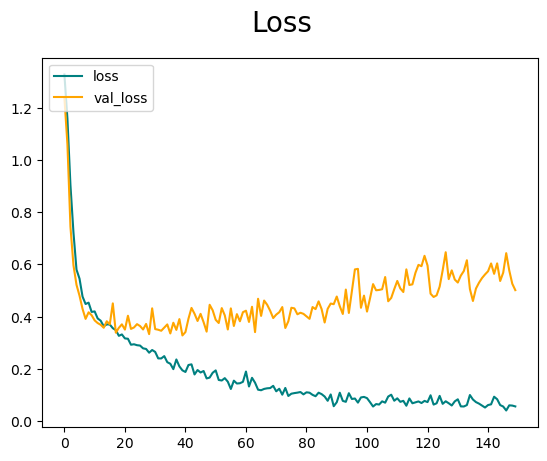

In [259]:
fig = plt.figure()
plt.plot(cnn_history.history['loss'], color='teal', label='loss')
plt.plot(cnn_history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

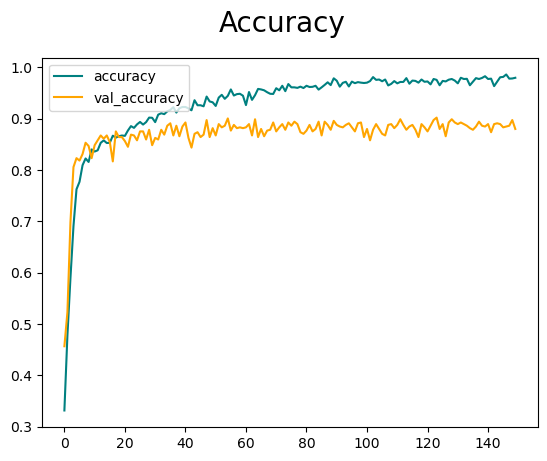

In [280]:
fig = plt.figure()
plt.plot(cnn_history.history['accuracy'], color='teal', label='accuracy')
plt.plot(cnn_history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [281]:
ypred_cnn = cnn_model.predict(test_images)
ypred_cnn

20/20 [==============================] - 1s 22ms/step


array([[9.9993491e-01, 1.7796463e-06, 1.7675964e-06, 6.1568018e-05],
       [1.1480374e-15, 3.8733316e-29, 1.0000000e+00, 1.8413005e-18],
       [7.2055265e-08, 1.3201734e-17, 9.9999690e-01, 3.0247813e-06],
       ...,
       [6.0500027e-18, 9.9944624e-25, 1.0000000e+00, 1.0286074e-15],
       [9.9644715e-01, 7.0006376e-11, 1.0772994e-07, 3.5528161e-03],
       [1.7272076e-02, 9.8251235e-01, 6.3030247e-06, 2.0934270e-04]],
      dtype=float32)

In [282]:
ypred_cnn_classes = np.argmax(ypred_cnn, axis=1)
ypred_cnn_classes

array([0, 2, 2, 3, 3, 1, 3, 0, 1, 0, 1, 0, 1, 1, 0, 1, 3, 3, 1, 0, 1, 1,
       1, 2, 2, 0, 3, 2, 0, 2, 3, 2, 0, 0, 2, 2, 2, 1, 3, 0, 2, 2, 2, 2,
       1, 1, 1, 2, 3, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 3, 2, 0,
       2, 3, 2, 3, 3, 0, 1, 3, 1, 2, 1, 3, 3, 3, 0, 1, 3, 0, 0, 2, 1, 3,
       2, 1, 3, 1, 0, 2, 1, 1, 0, 0, 3, 3, 0, 3, 0, 3, 2, 3, 1, 1, 0, 0,
       1, 3, 3, 2, 3, 1, 0, 0, 2, 0, 1, 3, 1, 2, 2, 3, 2, 1, 3, 1, 3, 0,
       2, 3, 1, 3, 2, 3, 3, 3, 3, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1,
       2, 0, 2, 2, 0, 0, 3, 0, 0, 1, 3, 3, 1, 0, 1, 1, 2, 3, 1, 3, 3, 2,
       1, 2, 1, 3, 2, 3, 1, 0, 2, 3, 0, 2, 1, 0, 0, 3, 1, 2, 3, 2, 0, 1,
       3, 0, 3, 1, 2, 0, 2, 0, 1, 1, 0, 0, 3, 0, 1, 1, 2, 2, 3, 2, 3, 0,
       0, 0, 0, 1, 3, 3, 0, 2, 3, 2, 1, 2, 1, 1, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 2, 2, 1, 0, 2, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 2, 1,
       3, 2, 0, 3, 0, 3, 2, 1, 0, 0, 2, 0, 0, 0, 3, 2, 1, 1, 1, 1, 3, 0,
       1, 2, 0, 2, 1, 2, 2, 3, 1, 2, 0, 2, 3, 1, 1,

In [283]:
test_labels

array([0, 2, 2, 0, 0, 1, 3, 3, 1, 3, 1, 0, 1, 1, 0, 3, 3, 0, 1, 0, 1, 1,
       1, 2, 2, 3, 3, 2, 3, 2, 3, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 2, 3, 0, 2, 2, 1, 2, 2, 0, 2, 0, 3, 2, 0, 0, 0, 3, 2, 0,
       2, 3, 2, 3, 3, 3, 1, 3, 0, 2, 1, 3, 1, 3, 0, 1, 3, 3, 1, 2, 1, 3,
       2, 1, 3, 1, 0, 2, 1, 1, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 1, 1, 0, 0,
       1, 3, 3, 2, 3, 3, 3, 0, 2, 3, 1, 3, 1, 2, 2, 3, 2, 1, 3, 3, 3, 0,
       2, 3, 1, 3, 2, 3, 3, 3, 3, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 3,
       2, 0, 2, 2, 3, 0, 3, 0, 0, 1, 0, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 2,
       1, 2, 1, 3, 2, 3, 1, 3, 2, 3, 0, 2, 1, 0, 0, 3, 1, 2, 3, 2, 0, 1,
       3, 0, 3, 1, 2, 3, 2, 0, 1, 3, 0, 0, 3, 0, 1, 1, 2, 2, 3, 2, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 2, 3, 2, 1, 2, 1, 1, 1, 3, 3, 0, 1, 3, 1, 3,
       1, 2, 2, 1, 0, 2, 3, 2, 2, 0, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 2, 1,
       3, 2, 0, 3, 0, 0, 2, 1, 3, 0, 2, 0, 0, 0, 3, 2, 1, 1, 1, 0, 0, 0,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1,

In [284]:
from tensorflow.keras.metrics import Precision, Recall
cnn_pre = Precision()
cnn_re = Recall()


cnn_pre.update_state(test_labels, ypred_cnn_classes)
cnn_re.update_state(test_labels, ypred_cnn_classes)


In [285]:
print(f"precision: {cnn_pre.result().numpy()}, Recall: {cnn_re.result().numpy()}")

precision: 0.9188596606254578, Recall: 0.9108695387840271


In [287]:
confusion_mat = confusion_matrix(test_labels, ypred_cnn_classes)
confusion_mat


array([[136,   9,   1,  27],
       [  7, 138,   0,   7],
       [  0,   0, 147,   0],
       [ 34,  11,   0, 116]], dtype=int64)

In [288]:
import itertools
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
	'''
	This function plot confusion matrix method from sklearn package.
	'''

	plt.figure(figsize= (7, 7))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()

	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')

	else:
		print('Confusion Matrix, Without Normalization')

	print(cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

Confusion Matrix, Without Normalization
[[136   9   1  27]
 [  7 138   0   7]
 [  0   0 147   0]
 [ 34  11   0 116]]


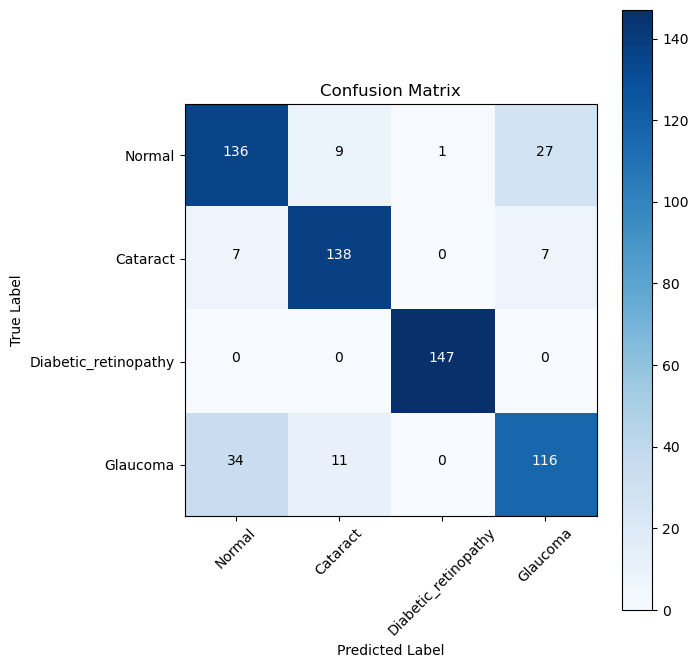

In [290]:
cm = confusion_matrix(test_labels, ypred_cnn_classes)
plot_confusion_matrix(cm= cm, classes= class_names, title = 'Confusion Matrix')

In [328]:
report_cnn = classification_report(test_labels, ypred_cnn_classes)
print(report_cnn)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       173
           1       0.87      0.91      0.89       152
           2       0.99      1.00      1.00       147
           3       0.77      0.72      0.75       161

    accuracy                           0.85       633
   macro avg       0.85      0.85      0.85       633
weighted avg       0.85      0.85      0.85       633



## DNN

In [238]:
dnn_model = Sequential()
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Flatten())
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(4, activation='softmax'))

In [239]:
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
dnn_model.summary()

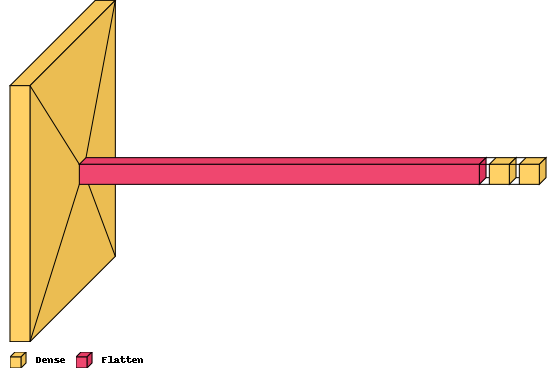

In [291]:
visualkeras.layered_view(dnn_model, legend=True)

In [241]:
dnn_history = dnn_model.fit(train_images, train_labels_encoded,epochs=25 , validation_data=(val_images, val_labels_encoded))

Epoch 1/25
93/93 [==============================] - 51s 511ms/step - loss: 1.4909 - accuracy: 0.5540 - val_loss: 0.8557 - val_accuracy: 0.6540
Epoch 2/25
93/93 [==============================] - 49s 523ms/step - loss: 0.7607 - accuracy: 0.6886 - val_loss: 0.7095 - val_accuracy: 0.7077
Epoch 3/25
93/93 [==============================] - 51s 550ms/step - loss: 0.6559 - accuracy: 0.7289 - val_loss: 0.6386 - val_accuracy: 0.7583
Epoch 4/25
93/93 [==============================] - 51s 552ms/step - loss: 0.6022 - accuracy: 0.7435 - val_loss: 0.7243 - val_accuracy: 0.7046
Epoch 5/25
93/93 [==============================] - 52s 557ms/step - loss: 0.5374 - accuracy: 0.7692 - val_loss: 0.6325 - val_accuracy: 0.7330
Epoch 6/25
93/93 [==============================] - 51s 553ms/step - loss: 0.4994 - accuracy: 0.7963 - val_loss: 0.6241 - val_accuracy: 0.7883
Epoch 7/25
93/93 [==============================] - 54s 577ms/step - loss: 0.4907 - accuracy: 0.8099 - val_loss: 0.6268 - val_accuracy: 0.7709

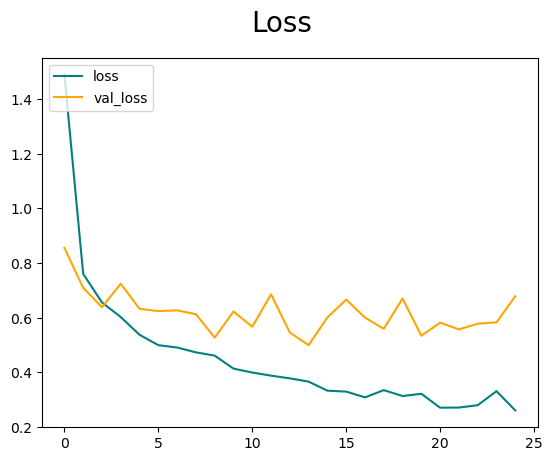

In [242]:
fig = plt.figure()
plt.plot(dnn_history.history['loss'], color='teal', label='loss')
plt.plot(dnn_history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

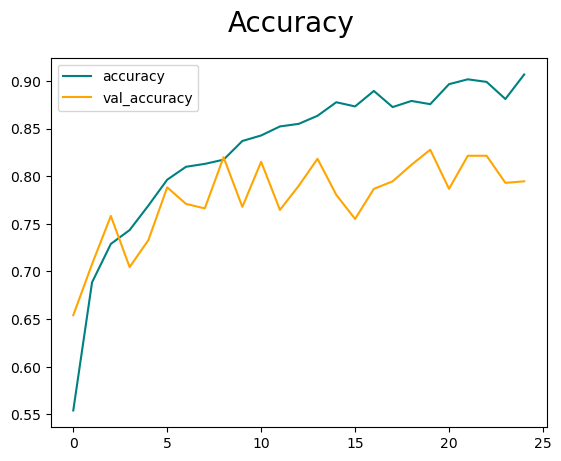

In [243]:
fig = plt.figure()
plt.plot(dnn_history.history['accuracy'], color='teal', label='accuracy')
plt.plot(dnn_history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [244]:
ypred_dnn = dnn_model.predict(test_images)
ypred_dnn

20/20 [==============================] - 1s 62ms/step


array([[2.25638658e-01, 5.14978589e-03, 3.98881202e-05, 7.69171715e-01],
       [1.37991714e-03, 4.06432059e-03, 9.79544699e-01, 1.50111057e-02],
       [4.82586009e-04, 4.60511394e-04, 9.98021364e-01, 1.03563699e-03],
       ...,
       [9.39985985e-05, 2.12655450e-05, 7.01789498e-01, 2.98095167e-01],
       [5.52214086e-01, 1.13764316e-01, 4.45257116e-04, 3.33576322e-01],
       [4.20284010e-02, 7.51736760e-01, 6.78568729e-04, 2.05556244e-01]],
      dtype=float32)

In [245]:
ypred_dnn_classes = np.argmax(ypred_dnn, axis=1)
ypred_dnn_classes

array([3, 2, 2, 1, 0, 1, 3, 0, 3, 0, 1, 3, 3, 1, 0, 3, 3, 3, 3, 0, 1, 1,
       1, 2, 2, 0, 3, 2, 0, 2, 3, 2, 0, 0, 2, 2, 2, 1, 3, 0, 2, 2, 2, 2,
       1, 1, 1, 2, 3, 3, 2, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0,
       2, 3, 2, 3, 3, 0, 0, 3, 1, 2, 1, 3, 1, 1, 0, 1, 3, 1, 1, 2, 1, 3,
       2, 3, 3, 1, 0, 2, 1, 1, 3, 3, 3, 3, 0, 1, 0, 3, 2, 0, 1, 1, 0, 0,
       3, 3, 1, 2, 3, 1, 3, 3, 2, 0, 1, 3, 3, 2, 2, 3, 2, 1, 3, 1, 3, 0,
       2, 3, 2, 3, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 1, 0, 3, 0, 3, 1, 3, 3,
       2, 3, 2, 2, 3, 0, 3, 3, 0, 1, 3, 3, 3, 3, 1, 1, 2, 3, 1, 3, 1, 2,
       1, 2, 1, 3, 2, 3, 1, 0, 2, 3, 0, 2, 1, 1, 3, 3, 1, 2, 1, 2, 3, 1,
       3, 1, 3, 1, 2, 3, 2, 0, 0, 1, 0, 3, 3, 0, 3, 3, 2, 2, 3, 2, 3, 0,
       3, 0, 3, 0, 0, 3, 0, 1, 3, 2, 1, 2, 1, 1, 1, 3, 3, 0, 1, 3, 1, 3,
       1, 2, 2, 1, 1, 2, 3, 2, 2, 3, 1, 0, 3, 3, 1, 3, 1, 1, 1, 1, 2, 1,
       3, 2, 0, 3, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 3, 2, 3, 1, 1, 1, 1, 1,
       1, 2, 3, 2, 1, 2, 2, 0, 3, 2, 3, 2, 3, 1, 1,

In [246]:
test_labels

array([0, 2, 2, 0, 0, 1, 3, 3, 1, 3, 1, 0, 1, 1, 0, 3, 3, 0, 1, 0, 1, 1,
       1, 2, 2, 3, 3, 2, 3, 2, 3, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 2, 3, 0, 2, 2, 1, 2, 2, 0, 2, 0, 3, 2, 0, 0, 0, 3, 2, 0,
       2, 3, 2, 3, 3, 3, 1, 3, 0, 2, 1, 3, 1, 3, 0, 1, 3, 3, 1, 2, 1, 3,
       2, 1, 3, 1, 0, 2, 1, 1, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 1, 1, 0, 0,
       1, 3, 3, 2, 3, 3, 3, 0, 2, 3, 1, 3, 1, 2, 2, 3, 2, 1, 3, 3, 3, 0,
       2, 3, 1, 3, 2, 3, 3, 3, 3, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 3,
       2, 0, 2, 2, 3, 0, 3, 0, 0, 1, 0, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 2,
       1, 2, 1, 3, 2, 3, 1, 3, 2, 3, 0, 2, 1, 0, 0, 3, 1, 2, 3, 2, 0, 1,
       3, 0, 3, 1, 2, 3, 2, 0, 1, 3, 0, 0, 3, 0, 1, 1, 2, 2, 3, 2, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 2, 3, 2, 1, 2, 1, 1, 1, 3, 3, 0, 1, 3, 1, 3,
       1, 2, 2, 1, 0, 2, 3, 2, 2, 0, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 2, 1,
       3, 2, 0, 3, 0, 0, 2, 1, 3, 0, 2, 0, 0, 0, 3, 2, 1, 1, 1, 0, 0, 0,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1,

In [252]:
dnn_pre = Precision()
dnn_re = Recall()

dnn_pre.update_state(test_labels, ypred_dnn_classes)
dnn_re.update_state(test_labels, ypred_dnn_classes)

In [253]:
print(f"precision: {dnn_pre.result().numpy()}, Recall: {dnn_re.result().numpy()}")

precision: 0.8605577945709229, Recall: 0.939130425453186


Confusion Matrix, Without Normalization
[[103  18   2  50]
 [  8 116   1  27]
 [  0   2 145   0]
 [ 20  24   0 117]]


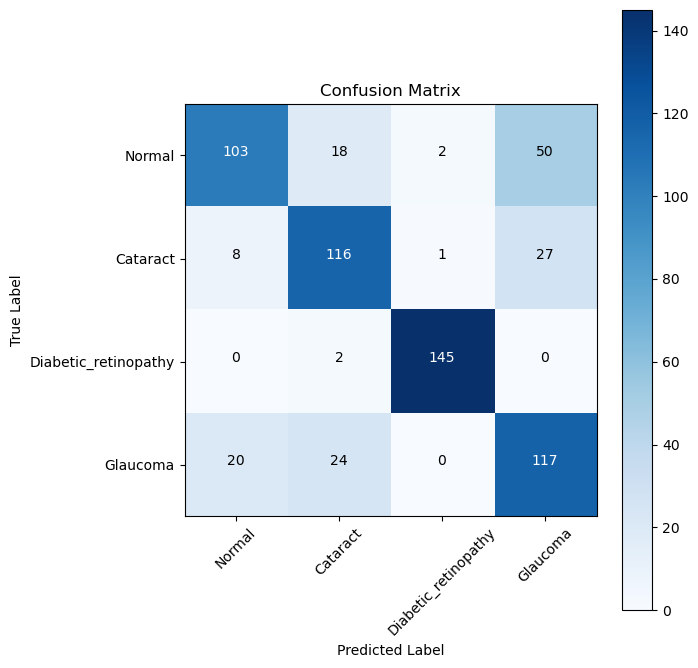

In [254]:
dnn_cm = confusion_matrix(test_labels, ypred_dnn_classes)
plot_confusion_matrix(cm= dnn_cm, classes= class_names, title = 'Confusion Matrix')

In [327]:
report_dnn = classification_report(test_labels, ypred_dnn_classes)
print(report_dnn)

              precision    recall  f1-score   support

           0       0.79      0.60      0.68       173
           1       0.72      0.76      0.74       152
           2       0.98      0.99      0.98       147
           3       0.60      0.73      0.66       161

    accuracy                           0.76       633
   macro avg       0.77      0.77      0.77       633
weighted avg       0.77      0.76      0.76       633



### Resnet model 

In [299]:
# Import the necessary libraries
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception 
from keras.applications import VGG16
from keras.applications import VGG19
from tensorflow.keras.applications.efficientnet import EfficientNetB3, EfficientNetB0
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalMaxPooling2D

In [83]:
#base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(64, 64, 3))

ValueError: Input size must be at least 75x75; Received: input_shape=(64, 64, 3)

In [ ]:
#inc_model = Sequential()
#inc_model.add(base_model)
#inc_model.add(BatchNormalization())
#inc_model.add(Dense(256, activation='relu'))
#inc_model.add(Dropout(0.2))
#inc_model.add(Dense(4, activation='softmax'))

In [ ]:
#inc_model.compile(optimizer='adam',
 #            loss='categorical_crossentropy',
  #           metrics=['accuracy'])

In [ ]:
#inc_history = inc_model.fit(train_images, train_labels_encoded,
 #                   epochs=30,
  #                  validation_data=(val_images, val_labels_encoded))

In [85]:
#base_model = Xception(include_top=False, weights='imagenet', input_shape=(64, 64, 3))

ValueError: Input size must be at least 71x71; Received: input_shape=(64, 64, 3)

In [ ]:
#x_model = Sequential()
#x_model.add(base_model)
#x_model.add(BatchNormalization())
#x_model.add(Dense(256, activation='relu'))
#x_model.add(Dropout(0.2))
#x_model.add(Dense(4, activation='softmax'))

In [ ]:
#inc_model.compile(optimizer='adam',
#             loss='categorical_crossentropy',
#             metrics=['accuracy'])

In [ ]:
#inc_history = res_model.fit(train_images, train_labels_encoded,
 #                   epochs=30,
  #                  validation_data=(val_images, val_labels_encoded))

In [189]:
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


58889256/58889256 [==============================] - 19s 0us/step


In [190]:
#v16_model = Sequential()
#v16_model.add(base_model)
#v16_model.add(Flatten())
#v16_model.add(Dense(256, activation='relu'))
#v16_model.add(Dropout(0.5))
#v16_model.add(Dense(4, activation='softmax'))

In [192]:
#optimizer = Adam(learning_rate=0.001)
#v16_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [193]:
#v16_model.fit(
#    datagen.flow(train_images, train_labels_encoded, batch_size=batch_size),
#    epochs=epochs,
#    validation_data=(val_images, val_labels_encoded))

Epoch 1/40
93/93 [==============================] - 89s 859ms/step - loss: 1.0589 - accuracy: 0.5469 - val_loss: 1.0433 - val_accuracy: 0.5197
Epoch 2/40
93/93 [==============================] - 84s 904ms/step - loss: 0.8296 - accuracy: 0.6659 - val_loss: 1.0007 - val_accuracy: 0.5434
Epoch 3/40
93/93 [==============================] - 88s 944ms/step - loss: 0.7874 - accuracy: 0.6652 - val_loss: 0.9847 - val_accuracy: 0.5308
Epoch 4/40
93/93 [==============================] - 88s 949ms/step - loss: 0.7514 - accuracy: 0.6994 - val_loss: 1.0707 - val_accuracy: 0.5024
Epoch 5/40
93/93 [==============================] - 85s 917ms/step - loss: 0.7477 - accuracy: 0.6974 - val_loss: 1.0005 - val_accuracy: 0.5308
Epoch 6/40
93/93 [==============================] - ETA: 0s - loss: 0.7038 - accuracy: 0.7133

KeyboardInterrupt: 

In [304]:
#base_model = ResNet50(include_top=False, weights='imagenet')

In [159]:
#res_model = Sequential()
#res_model.add(base_model)
#res_model.add(Flatten())
#res_model.add(Dense(256, activation='relu'))
#res_model.add(Dropout(0.2))
#res_model.add(Dense(4, activation='softmax'))

In [308]:
#res_model.compile(optimizer='adam',
#             loss='categorical_crossentropy',
#             metrics=['accuracy'])

In [309]:
#res_history = res_model.fit(train_images, train_labels_encoded,
#                    epochs=30,
#                    validation_data=(val_images, val_labels_encoded))

Epoch 1/30
93/93 [==============================] - 275s 3s/step - loss: 0.7856 - accuracy: 0.7055 - val_loss: 1.7420 - val_accuracy: 0.2796
Epoch 2/30
28/93 [========>.....................] - ETA: 2:44 - loss: 0.5118 - accuracy: 0.8170

KeyboardInterrupt: 

In [182]:
#base_model = EfficientNetB3(include_top=False, weights= "imagenet", input_shape= (64,64, 3))

In [184]:
#net_model = Sequential()
#net_model.add(base_model)
#net_model.add(BatchNormalization())
#net_model.add(Flatten())
#net_model.add(Dense(512, activation='relu'))
#net_model.add(Dropout(0.5))
#net_model.add(Dense(4, activation='softmax'))

In [185]:
#optimizer = Adam(learning_rate=0.001)
#net_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#net_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 2, 2, 1536)       10783535  
                                                                 
 batch_normalization_8 (Batc  (None, 2, 2, 1536)       6144      
 hNormalization)                                                 
                                                                 
 flatten_7 (Flatten)         (None, 6144)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               3146240   
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 2052      
                                                     

In [188]:
#net_history = net_model.fit(
#    datagen.flow(train_images, train_labels_encoded, batch_size=32),
#    epochs=40,
#    validation_data=(val_images, val_labels_encoded) ,callbacks=[reduce_lr])

Epoch 1/40
93/93 [==============================] - 186s 2s/step - loss: 1.7872 - accuracy: 0.4622 - val_loss: 2.1026 - val_accuracy: 0.2338 - lr: 0.0010
Epoch 2/40
93/93 [==============================] - 146s 2s/step - loss: 0.9529 - accuracy: 0.6073 - val_loss: 1.4028 - val_accuracy: 0.2859 - lr: 0.0010
Epoch 3/40
93/93 [==============================] - 147s 2s/step - loss: 0.8503 - accuracy: 0.6621 - val_loss: 1.4618 - val_accuracy: 0.3128 - lr: 0.0010
Epoch 4/40
93/93 [==============================] - 143s 2s/step - loss: 0.7363 - accuracy: 0.7225 - val_loss: 5.2711 - val_accuracy: 0.2796 - lr: 0.0010
Epoch 5/40
93/93 [==============================] - 148s 2s/step - loss: 0.7602 - accuracy: 0.7306 - val_loss: 1.8286 - val_accuracy: 0.2480 - lr: 0.0010
Epoch 6/40
93/93 [==============================] - 145s 2s/step - loss: 0.7975 - accuracy: 0.7238 - val_loss: 1.9100 - val_accuracy: 0.2401 - lr: 0.0010
Epoch 7/40
93/93 [==============================] - 145s 2s/step - loss: 0.7

KeyboardInterrupt: 

In [ ]:
#y_pred = net_model.predict(test_images)
#y_pred

In [ ]:
#ypred_classes = np.argmax(y_pred, axis=1)
#ypred_classes

### EfficientNetB3 

In [315]:
def make_model():
    effnet = EfficientNetB3(include_top=False, weights="imagenet",input_shape=(64,64,3), pooling='max') 
    effnet.trainable=False
    
    for layer in effnet.layers[83:]:
      layer.trainable=True
    
    x = effnet.output
    x = BatchNormalization()(x)
    x = Dense(1024, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
    x = Dropout(rate=.45, seed=2022)(x)        
    output=Dense(4, activation='softmax')(x)
    
    model= tf.keras.Model(inputs=effnet.input, outputs=output)
    model.compile(optimizer = 'adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
    return model

In [316]:
net_model = make_model()

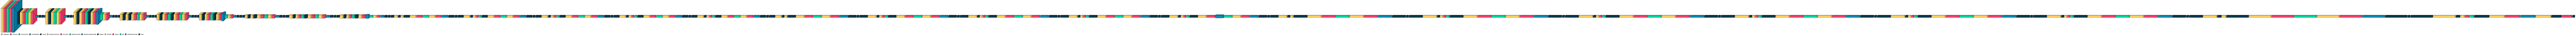

In [329]:
visualkeras.layered_view(net_model, legend=True)

In [317]:
from keras import callbacks 
early_stop = callbacks.EarlyStopping(
        monitor="val_accuracy", 
        patience=10,
        verbose=1,
        mode="max",
        restore_best_weights=True, 
     )

net_history = net_model.fit(
    train_images,
    train_labels,
    validation_data=(val_images,
                     val_labels),
    epochs = 50,
    callbacks=[early_stop],
)

Epoch 1/50
93/93 [==============================] - 175s 2s/step - loss: 18.4637 - accuracy: 0.4138 - val_loss: 14.2225 - val_accuracy: 0.2796
Epoch 2/50
93/93 [==============================] - 127s 1s/step - loss: 12.0615 - accuracy: 0.4521 - val_loss: 10.3855 - val_accuracy: 0.2480
Epoch 3/50
93/93 [==============================] - 121s 1s/step - loss: 8.9605 - accuracy: 0.4673 - val_loss: 7.8985 - val_accuracy: 0.3570
Epoch 4/50
93/93 [==============================] - 116s 1s/step - loss: 6.7533 - accuracy: 0.5266 - val_loss: 5.9683 - val_accuracy: 0.4708
Epoch 5/50
93/93 [==============================] - 128s 1s/step - loss: 5.1614 - accuracy: 0.5798 - val_loss: 4.5203 - val_accuracy: 0.5545
Epoch 6/50
93/93 [==============================] - 129s 1s/step - loss: 3.9954 - accuracy: 0.6096 - val_loss: 3.5759 - val_accuracy: 0.5624
Epoch 7/50
93/93 [==============================] - 130s 1s/step - loss: 3.1688 - accuracy: 0.6205 - val_loss: 2.8111 - val_accuracy: 0.6398
Epoch 8/5

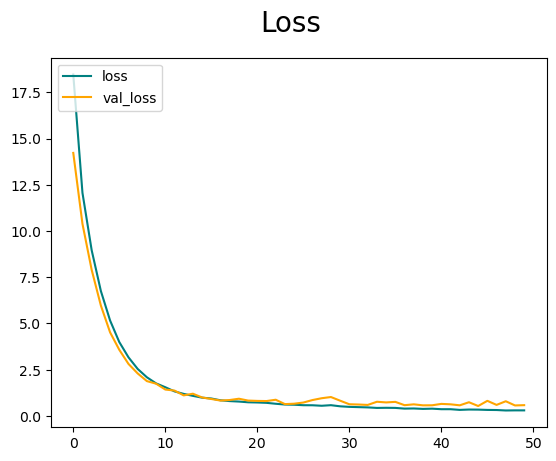

In [318]:
fig = plt.figure()
plt.plot(net_history.history['loss'], color='teal', label='loss')
plt.plot(net_history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

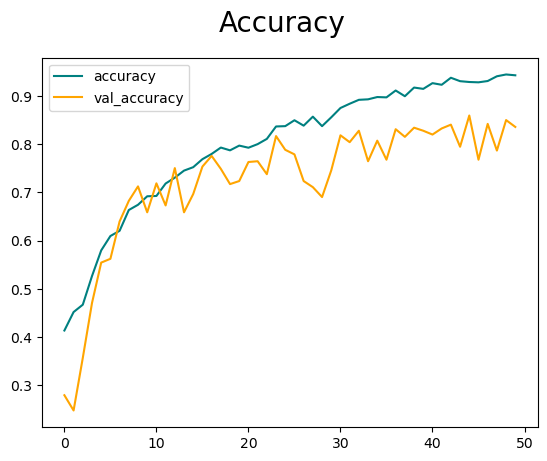

In [319]:
fig = plt.figure()
plt.plot(net_history.history['accuracy'], color='teal', label='accuracy')
plt.plot(net_history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [320]:
ypred_net = net_model.predict(test_images)
ypred_net

20/20 [==============================] - 11s 313ms/step


array([[0.9219795 , 0.00642008, 0.00210881, 0.06949163],
       [0.0043828 , 0.00283905, 0.9883045 , 0.00447356],
       [0.00327177, 0.00209928, 0.99118656, 0.00344234],
       ...,
       [0.02699679, 0.01646337, 0.8921532 , 0.06438659],
       [0.96727127, 0.00817884, 0.00197284, 0.02257711],
       [0.01621712, 0.94927496, 0.0056284 , 0.02887954]], dtype=float32)

In [321]:
ypred_net_classes = np.argmax(ypred_net, axis=1)
ypred_net_classes

array([0, 2, 2, 0, 0, 1, 3, 3, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 1, 3,
       1, 2, 2, 3, 3, 2, 0, 2, 3, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       1, 0, 1, 2, 3, 3, 2, 2, 1, 2, 2, 0, 2, 0, 3, 2, 0, 0, 1, 3, 2, 0,
       2, 0, 2, 3, 3, 3, 0, 3, 3, 2, 1, 3, 0, 1, 3, 1, 3, 0, 1, 2, 1, 3,
       2, 0, 3, 1, 0, 2, 1, 1, 0, 3, 3, 3, 0, 0, 0, 0, 2, 0, 3, 1, 0, 0,
       0, 3, 3, 2, 3, 0, 0, 0, 2, 0, 0, 3, 1, 2, 2, 3, 2, 1, 3, 3, 3, 0,
       2, 3, 1, 0, 2, 3, 3, 3, 3, 1, 3, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 3,
       2, 0, 2, 2, 3, 0, 1, 0, 0, 1, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 2,
       1, 2, 1, 3, 2, 3, 1, 3, 2, 3, 0, 2, 1, 0, 3, 3, 0, 2, 3, 2, 0, 1,
       3, 0, 3, 1, 2, 0, 2, 0, 1, 0, 0, 3, 3, 0, 1, 1, 2, 2, 3, 2, 3, 0,
       0, 0, 0, 0, 0, 3, 0, 2, 3, 2, 1, 2, 1, 1, 1, 3, 3, 0, 1, 3, 0, 3,
       1, 2, 2, 1, 3, 2, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 2, 1,
       0, 2, 0, 3, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 3, 2, 0, 1, 1, 0, 1, 3,
       1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1,

In [322]:
test_labels

array([0, 2, 2, 0, 0, 1, 3, 3, 1, 3, 1, 0, 1, 1, 0, 3, 3, 0, 1, 0, 1, 1,
       1, 2, 2, 3, 3, 2, 3, 2, 3, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 2, 3, 0, 2, 2, 1, 2, 2, 0, 2, 0, 3, 2, 0, 0, 0, 3, 2, 0,
       2, 3, 2, 3, 3, 3, 1, 3, 0, 2, 1, 3, 1, 3, 0, 1, 3, 3, 1, 2, 1, 3,
       2, 1, 3, 1, 0, 2, 1, 1, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 1, 1, 0, 0,
       1, 3, 3, 2, 3, 3, 3, 0, 2, 3, 1, 3, 1, 2, 2, 3, 2, 1, 3, 3, 3, 0,
       2, 3, 1, 3, 2, 3, 3, 3, 3, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 3,
       2, 0, 2, 2, 3, 0, 3, 0, 0, 1, 0, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 2,
       1, 2, 1, 3, 2, 3, 1, 3, 2, 3, 0, 2, 1, 0, 0, 3, 1, 2, 3, 2, 0, 1,
       3, 0, 3, 1, 2, 3, 2, 0, 1, 3, 0, 0, 3, 0, 1, 1, 2, 2, 3, 2, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 2, 3, 2, 1, 2, 1, 1, 1, 3, 3, 0, 1, 3, 1, 3,
       1, 2, 2, 1, 0, 2, 3, 2, 2, 0, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 2, 1,
       3, 2, 0, 3, 0, 0, 2, 1, 3, 0, 2, 0, 0, 0, 3, 2, 1, 1, 1, 0, 0, 0,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1,

In [ ]:
target_names = ['class 0', 'class 1', 'class 2','']

In [325]:
report = classification_report(test_labels, ypred_net_classes)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       173
           1       0.92      0.76      0.83       152
           2       0.99      1.00      0.99       147
           3       0.76      0.71      0.74       161

    accuracy                           0.82       633
   macro avg       0.83      0.82      0.82       633
weighted avg       0.83      0.82      0.82       633



In [194]:
#base_model = EfficientNetB0(weights='imagenet', 
#                            include_top=False, 
#                            input_shape=(64, 64, 3))
#for layer in base_model.layers:
#    layer.trainable = False
#

In [195]:
#net0_model = Sequential()
#net0_model.add(base_model)
#net0_model.add(Flatten())
#net0_model.add(Dense(128, activation='relu'))     
#net0_model.add(Dropout(0.4))    
#net0_model.add(Dense(4, activation='softmax'))

In [196]:
#net0_model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [197]:
#net0_history = net0_model.fit(train_images, train_labels_encoded,epochs=50 , validation_data=(val_images, val_labels_encoded))

Epoch 1/50
93/93 [==============================] - 37s 316ms/step - loss: 1.4651 - accuracy: 0.2484 - val_loss: 1.3863 - val_accuracy: 0.2559
Epoch 2/50
93/93 [==============================] - 30s 320ms/step - loss: 1.3863 - accuracy: 0.2579 - val_loss: 1.3864 - val_accuracy: 0.2433
Epoch 3/50
93/93 [==============================] - 25s 269ms/step - loss: 1.3860 - accuracy: 0.2609 - val_loss: 1.3867 - val_accuracy: 0.2433
Epoch 4/50
93/93 [==============================] - 26s 285ms/step - loss: 1.3859 - accuracy: 0.2609 - val_loss: 1.3868 - val_accuracy: 0.2433
Epoch 5/50
93/93 [==============================] - 26s 278ms/step - loss: 1.3859 - accuracy: 0.2609 - val_loss: 1.3869 - val_accuracy: 0.2433
Epoch 6/50
93/93 [==============================] - 25s 268ms/step - loss: 1.3858 - accuracy: 0.2609 - val_loss: 1.3871 - val_accuracy: 0.2433
Epoch 7/50
93/93 [==============================] - 25s 270ms/step - loss: 1.3857 - accuracy: 0.2609 - val_loss: 1.3873 - val_accuracy: 0.2433

KeyboardInterrupt: 

### Image Upload (Only JPG) 

In [341]:
from tkinter import *
from tkinter import messagebox, filedialog, messagebox, ttk
from PIL import ImageTk, Image
root = Tk()
root.title("Detection")

#title
title_label = Label(root, bg="gray", padx=430, text="Detection")
title_label.grid(row = 0, column = 0)

#Input Image
JPG_file_name = Label(root ,text="No Picture Selected")
def ChooseJPGFile():
    root.filename = filedialog.askopenfilename(initialdir="/C", title="Select JPG File", filetypes=(("JPG Files", "*.jpg"),))   
    JPG_file_name["text"] = root.filename
    
    global file_path
    file_path = JPG_file_name["text"]
#     print(file_path)
    
empty_row = Label(root,text="")
empty_row.grid(row = 18, column = 0)
choose_CSV_button = Button(root, text="Choose Select JPG File For Eye Retina", command= ChooseJPGFile)
choose_CSV_button.grid(row = 19, column = 0)

# IF IT GIVES YOU ERROR IT IS HERE THE FILE PATH IS NOT VISABLE


root.geometry("930x700")
root.mainloop()

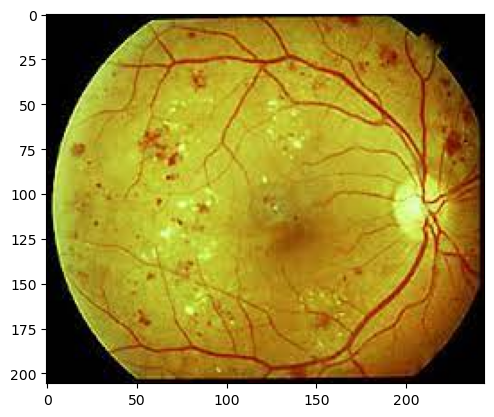

In [342]:
img = cv2.imread(file_path)
resize = tf.image.resize(img, (64,64))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Test the Uploaded Image 

In [343]:
yhat = net_model.predict(np.expand_dims(resize/255, 0))
yhat = np.argmax(yhat, axis=1)
yhat

1/1 [==============================] - 0s 76ms/step


array([2], dtype=int64)

In [344]:
if yhat == 0:
    print('normal')
elif yhat == 1:
    print('cataract')
elif yhat == 2:
    print('diabetic_retinopathy')
elif yhat == 3:
    print('glaucoma')
else:
    print("di 3en di wla hagar")

diabetic_retinopathy
